In [114]:
# import necessary libraries

import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
import warnings
warnings.filterwarnings("ignore") 

In [115]:
# Import csv to read data 

data = pd.read_csv('USA_Housing.csv')
data.head(4)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820


In [116]:
# Copy original data

df = data.copy()
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [117]:
# check for missing values

df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [118]:
# overview of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [119]:
# Drop the 'Address' column as it is not needed for prediction

df.drop('Address', axis=1, inplace=True)

In [120]:
# Statistical Summary of DataFrame

df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [121]:
# scale columns with high std

toBeScaled = ['Avg. Area Income', 'Area Population']
scaled = {}

for i in toBeScaled:
    scaler = StandardScaler()
    df[i] = scaler.fit_transform(df[[i]])
    scaled[i + '_scaled'] = scaler
    joblib.dump(scaler, open(f'{i}_scaler.pkl', 'wb')) # ..................... Save the scaler into my file directory

scaled

{'Avg. Area Income_scaled': StandardScaler(),
 'Area Population_scaled': StandardScaler()}

,Price
Avg. Area Number of Bedrooms,
5.14,1.607233e+06
5.50,1.584794e+06
5.15,1.536191e+06
6.32,1.523839e+06
6.24,1.521457e+06
6.10,1.500380e+06
5.46,1.495660e+06
6.21,1.495319e+06
5.24,1.479250e+06


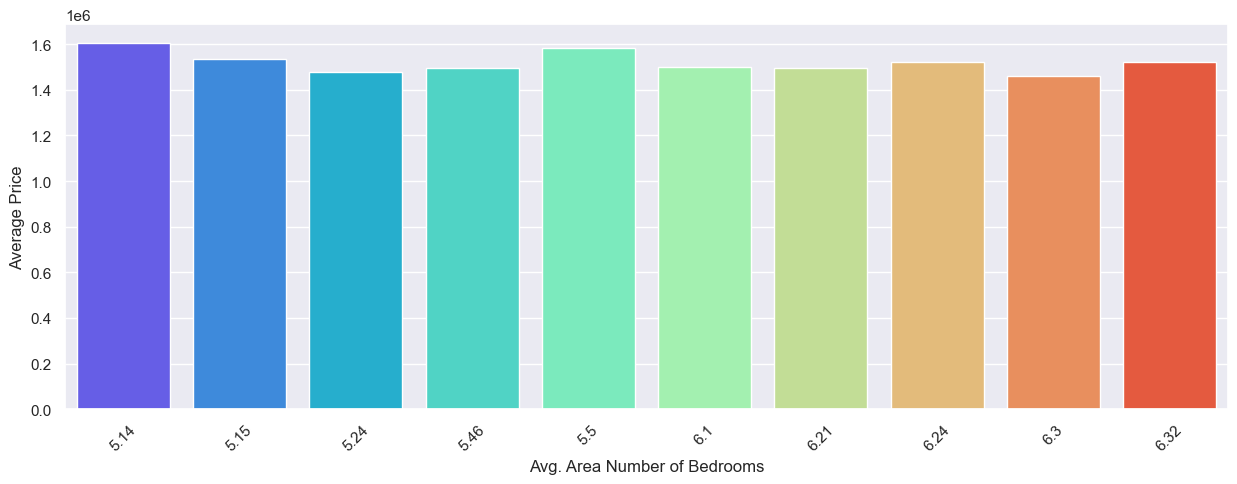

In [122]:
Avgrooms_sel = df[['Avg. Area Number of Bedrooms', 'Price']]
Avgrooms_sel =Avgrooms_sel.groupby('Avg. Area Number of Bedrooms')[['Price']].mean().sort_values(by='Price', ascending=False).head(10)
display(Avgrooms_sel)

# Plot the results with a title for Avg. Area Number of Bedrooms
plt.figure(figsize=(15, 5))
sns.barplot(data=Avgrooms_sel, x=Avgrooms_sel.index, y='Price', ci=None, palette='rainbow')
plt.xlabel('Avg. Area Number of Bedrooms')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [123]:
# display dataframe

df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,1.028660,5.682861,7.009188,4.09,-1.317599,1.059034e+06
1,1.000808,6.002900,6.730821,3.09,0.403999,1.505891e+06
2,-0.684629,5.865890,8.512727,5.13,0.072410,1.058988e+06
3,-0.491499,7.188236,5.586729,3.26,-0.186734,1.260617e+06
4,-0.807073,5.040555,7.839388,4.23,-0.988387,6.309435e+05


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<Axes: >

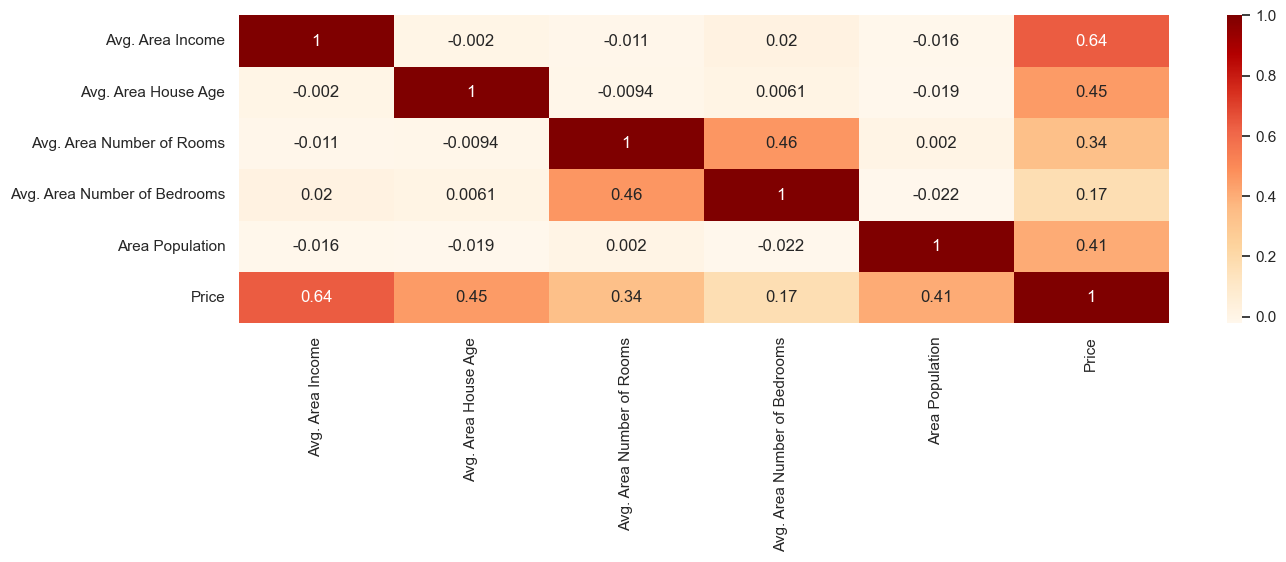

In [124]:
# check for multicollinearity

corr = df.corr()
display (corr)
plt.figure(figsize = (15,4))
sns.heatmap(corr, annot = True, cmap = 'OrRd')

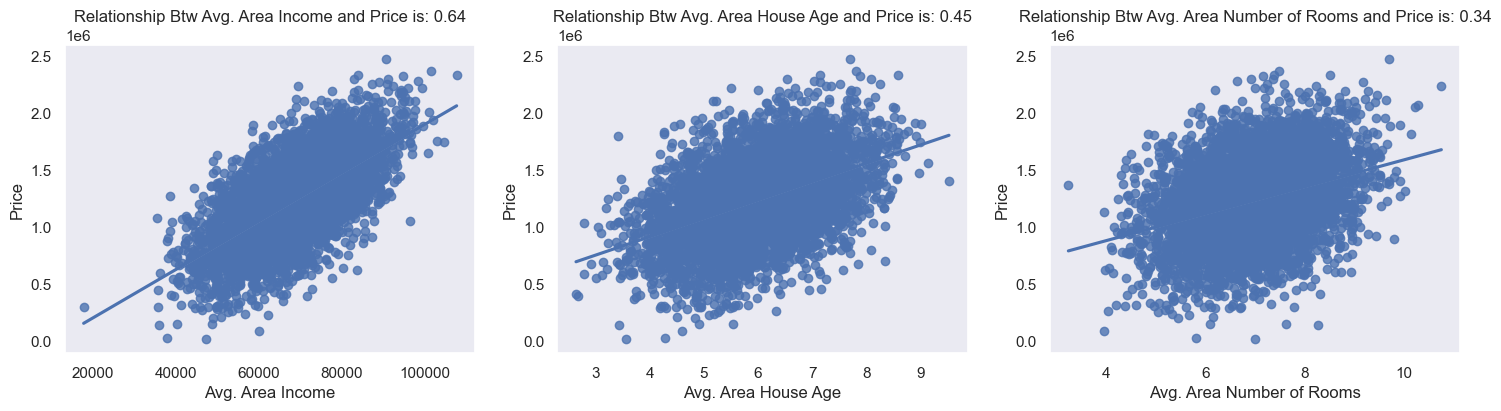

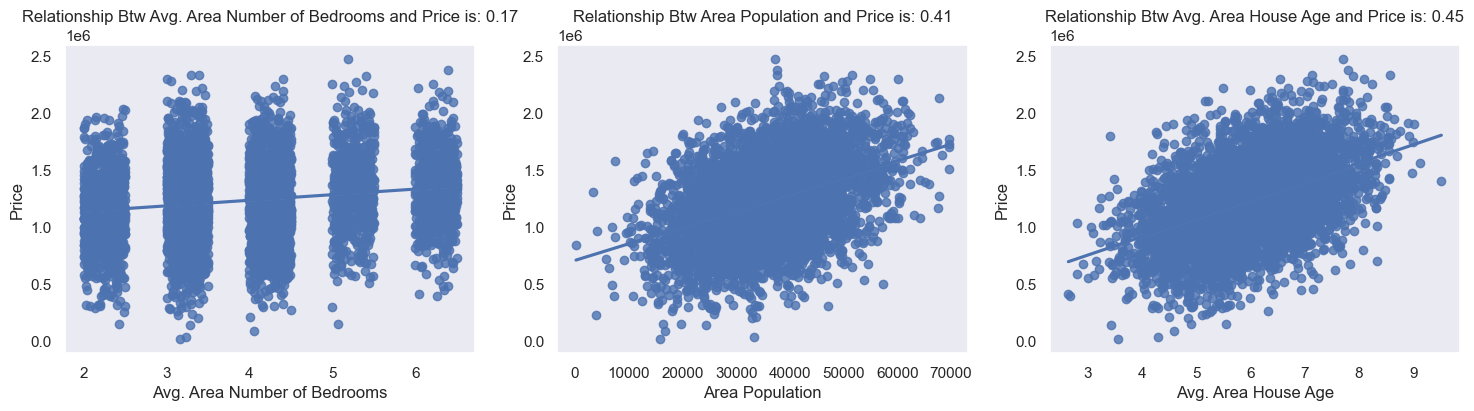

In [125]:
# check for linear relationship

def plotter(dataframe, col1, col2, col3, dep_var):
    sns.set(style = 'darkgrid')

    plt.figure(figsize = (18, 4))
    plt.subplot(1, 3, 1)
    sns.regplot(x = dataframe[col1], y = dataframe[dep_var], ci = 0)
    plt.title(f"Relationship Btw {col1} and {dep_var} is: {dataframe[col1].corr(dataframe[dep_var]).round(2)}")
    plt.grid(False)

    plt.subplot(1, 3, 2)
    sns.regplot(x = dataframe[col2], y = dataframe[dep_var], ci = 0)
    plt.title(f"Relationship Btw {col2} and {dep_var} is: {dataframe[col2].corr(dataframe[dep_var]).round(2)}")
    plt.grid(False)

    plt.subplot(1, 3, 3)
    sns.regplot(x = dataframe[col3], y = dataframe[dep_var], ci = 0)
    plt.title(f"Relationship Btw {col3} and {dep_var} is: {dataframe[col3].corr(dataframe[dep_var]).round(2)}")
    plt.grid(False)

plotter(data, 'Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Price')
plotter(data, 'Avg. Area Number of Bedrooms', 'Area Population', 'Avg. Area House Age', 'Price')

In [126]:
# display columns

df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [145]:
from sklearn.model_selection import train_test_split

# Splitting Into Train and Test

x = df.drop('Price', axis = 1)
y = df.Price

xtrain, xtest, ytrain,ytest = train_test_split(x, y, test_size = 0.20, random_state = 20)


In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Initialize a Linear Regression model
Model_regressor = LinearRegression()

# Fit the model to the training data (xtrain, ytrain)
Model_regressor.fit(xtrain, ytrain)

# Cross-validation: predict the target variable for the training data
cross_validation = Model_regressor.predict(xtrain)

# Calculate and print the R-squared score between the predicted values and the actual target values
print(r2_score(cross_validation, ytrain))

from sklearn.metrics import mean_squared_error

# Predict the target variable for the training data
y_pred = Model_regressor.predict(xtrain)

# Calculate the mean squared error
mse = mean_squared_error(ytrain, y_pred)

print("Mean Squared Error (MSE):", mse)


0.9125768282688875
Mean Squared Error (MSE): 10165064098.757671


In [147]:
# Predict the target variable using the trained model
pred = Model_regressor.predict(xtest)
score = r2_score(pred, ytest).round(2) # Check the accuracy of the model

print(f'The Model is {score * 100}% accurate')

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(ytest, pred)

print(f'Mean Squared Error: {mse}')

The Model is 90.0% accurate
Mean Squared Error: 10451192937.276003


In [148]:
# Creating DataFrame to check predictions

check = pd.DataFrame()
check['Actual'] = ytest.reset_index(drop = True)
check['Predicted'] = pd.Series(pred)
check['Residuals'] = abs(check['Actual'] - check['Predicted'])

check

,Actual,Predicted,Residuals
0,1.789099e+06,1.801179e+06,12080.867228
1,1.584440e+06,1.592674e+06,8234.240019
2,8.942036e+05,8.214810e+05,72722.547977
3,1.006886e+06,8.833820e+05,123503.855527
4,6.194075e+05,6.267395e+05,7332.017703
...,...,...,...
995,1.270048e+06,1.355247e+06,85199.852796
996,1.591384e+06,1.708405e+06,117021.177699
997,1.452154e+06,1.266234e+06,185919.411850
998,1.432903e+06,1.533464e+06,100560.855359


<Axes: >

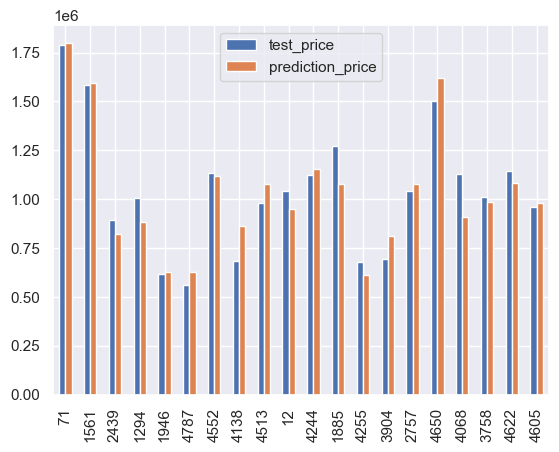

In [149]:
# Visualizing Predicted vs Actual House Prices

prediction_data = Model_regressor.predict(xtest)
model_result = pd.DataFrame({'test_price': ytest, "prediction_price": prediction_data})
model_result.head(20).plot(kind="bar")

Text(0.5, 1.0, 'Homoscedasticity Of The Model')

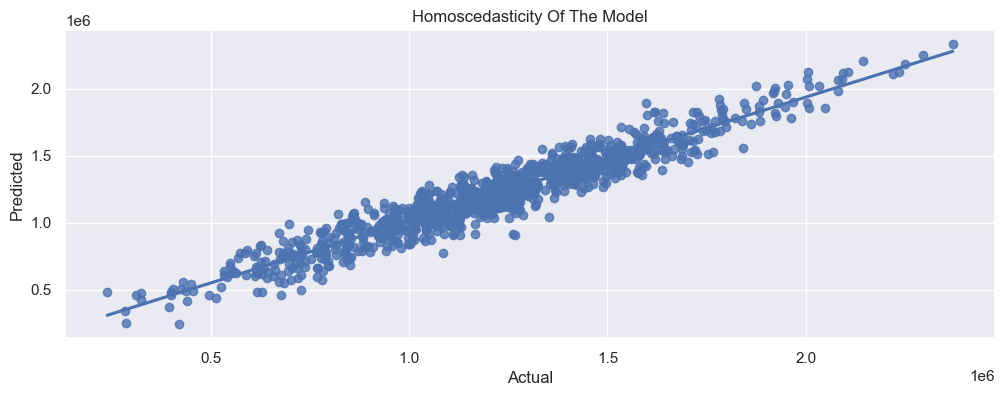

In [150]:
# Homoscedasticity
plt.figure(figsize = (12, 4))
sns.regplot(data = check, x = 'Actual', y = 'Predicted', ci = 0)
plt.title('Homoscedasticity Of The Model')

In [156]:
# save your model

joblib.dump(Model_regressor, open('HousepriceModel.pkl', 'wb'))

MODEL TESTING

In [171]:
# import data and read to csv

data =pd.read_csv('USA_Housing.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [172]:
# display columns

data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [173]:
# Select relevant columns for the analysis
sel_cols = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
            'Avg. Area Number of Bedrooms', 'Area Population']
test = data[sel_cols]
test.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [174]:
# display dataframe and drop address column

data.drop(columns=['Address'], inplace=True)
data.tail(10)


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
4990,52723.876555,5.452237,8.124571,6.39,14802.088438,4.795006e+05
4991,74102.191890,5.657841,7.683993,3.13,24041.270592,1.263721e+06
4992,87499.125743,6.403473,4.836091,4.02,40815.199679,1.568701e+06
4993,69639.140896,5.007510,7.778375,6.05,54056.128430,1.381831e+06
4994,73060.846226,5.293682,6.312253,4.16,22695.695480,9.053549e+05
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06


In [175]:
# Extract the specific house data from the test set

house_data = test.iloc[4994, :]
house_data = pd.DataFrame(house_data).transpose()
house_data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
4994,73060.846226,5.293682,6.312253,4.16,22695.69548


In [177]:
# import transformers
import joblib
area_pop = joblib.load('Area Population_scaler.pkl')
area_inc = joblib.load('Avg. Area Income_scaler.pkl')
model = joblib.load('HousepriceModel.pkl')

In [178]:
# transforming house data

house_data['Area Population'] = area_pop.transform(house_data[['Area Population']])
house_data['Avg. Area Income'] = area_inc.transform(house_data[['Avg. Area Income']])

house_data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
4994,0.420172,5.293682,6.312253,4.16,-1.357006


In [179]:
# predict house price

model.predict(house_data)

array([927277.3753021])